## TP1 - Parte 2
### Vision por computadora 1
#### Marcelo Chichiri
▪ Parte 1 (imágenes en /white_patch y /coord_cromaticas):
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

▪ Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. 
Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, 
considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas

## Resolución de la segunda parte del Trabajo práctico 1 de Visión por computadora 1 

In [1]:
# Carga de librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### 2-1.Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

In [2]:
# Cargar una imagen en modo monocromático (un canal)
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

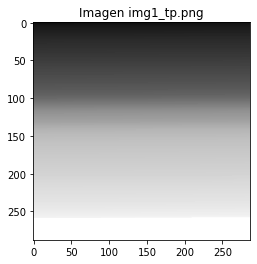

In [3]:
plt.title(f'Imagen img1_tp.png')
plt.imshow(img1, cmap='gray')
plt.show()

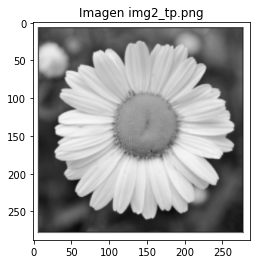

In [4]:
plt.title(f'Imagen img2_tp.png')
plt.imshow(img2, cmap='gray')
plt.show()

#### 2-2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

#### Se usan dos bins disntintos, uno de 63 y otro de 255 para poder comparar si los resultados obtenidos dependen de la cantidad de bins seleccionados

In [5]:
# Se usan dos bins distintos para comparar los resultados
nro_bins1 = 63
nro_bins2 = 255
hist1_1, _ = np.histogram(img1.ravel(),bins=nro_bins1)
hist1_2, _ = np.histogram(img2.ravel(),bins=nro_bins1)
hist2_1, _ = np.histogram(img1.ravel(),bins=nro_bins2)
hist2_2, _ = np.histogram(img2.ravel(),bins=nro_bins2)

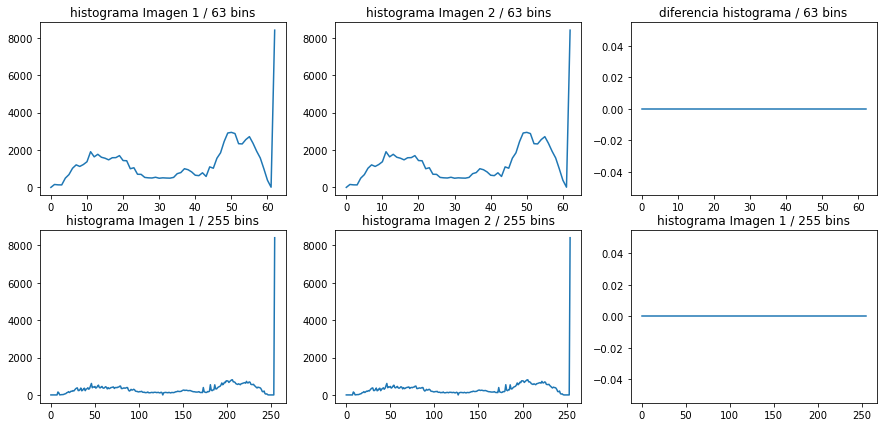

In [6]:
ax = plt.figure(figsize=(15, 7))
ax = plt.subplot(2, 3, 1)
plt.title(f'histograma Imagen 1 / {nro_bins1} bins')
ax.plot(hist1_1)
ax = plt.subplot(2, 3, 2)
plt.title(f'histograma Imagen 2 / {nro_bins1} bins')
ax.plot(hist1_2)
ax=plt.subplot(2, 3, 3)
plt.title(f'diferencia histograma / {nro_bins1} bins')
ax.plot(hist1_1 - hist1_2)
ax=plt.subplot(2, 3, 4)
plt.title(f'histograma Imagen 1 / {nro_bins2} bins')
ax.plot(hist2_1)
ax=plt.subplot(2, 3, 5)
plt.title(f'histograma Imagen 2 / {nro_bins2} bins')
ax.plot(hist2_2)
ax=plt.subplot(2, 3, 6)
plt.title(f'histograma Imagen 1 / {nro_bins2} bins')
ax.plot(hist2_1 - hist2_2)

### Conclusion sobre observación de histogramas

Elegí 63 y 255 bins ya que la imagen está compuesta por pixeles de enteros de 8 bits, por lo cual tomé un cuarto del mayor valor de intensidad y un valor medio. 

Calculé la diferencia entre los histogramas de las dos imágenes para verificar si son iguales. El resultado fue que los histogramas de las dos imágenes son iguales. 

Dado el resultado anterior se concluye que el histograma **no es adecuado para tomar como 'feature' para entrenar un modelo de clasificación/detección de imágenes** ya que no podría diferenciar entre las dos imágenes.


#### 2.3 - Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas

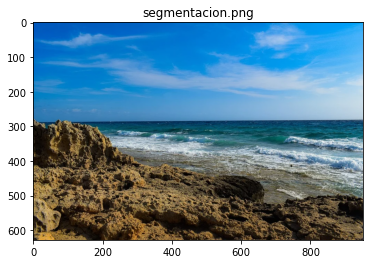

Formato inagen : (628, 953, 3)


In [7]:
# Lectura de archivo
Nombre_archivo='segmentacion.png'
imagen_BGR = cv.imread(Nombre_archivo)
imagen_RGB = cv.cvtColor(imagen_BGR, cv.COLOR_BGR2RGB)
#img_seg = leer_imagen_RGB(Nombre_archivo)
plt.title(Nombre_archivo)
plt.imshow(imagen_RGB)
plt.show()
print(f'Formato inagen : {np.shape(imagen_RGB)}')

### Segmentación usando histograma

In [8]:
# Se utiliza la función split de OpenCV para separar los canales de la imagen
im_R, im_G, im_B = cv.split(imagen_RGB)

In [9]:
# Se utiliza 256 bins para generar el histograma por canales de colores
histo_R, _ = np.histogram(im_R.ravel(), 256, [0,255])
histo_G, _ = np.histogram(im_G.ravel(), 256, [0,255])
histo_B, _ = np.histogram(im_B.ravel(), 256, [0,255])

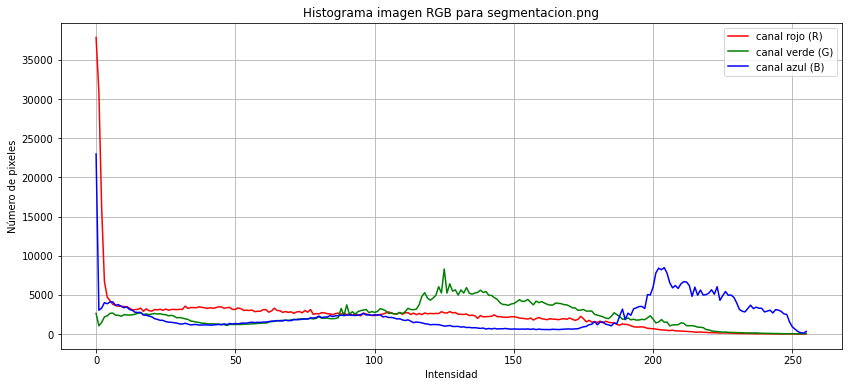

In [10]:
# Grafico los tres histogramas obtenidos anteriormente
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(6)

plt.plot(histo_R, color='r', label='canal rojo (R)')
plt.plot(histo_G, color='g', label='canal verde (G)')
plt.plot(histo_B, color='b', label='canal azul (B)')

plt.xlabel('Intensidad')
plt.ylabel('Número de pixeles')
plt.title(f'Histograma imagen RGB para {Nombre_archivo}')

plt.grid()
plt.legend()
plt.show()

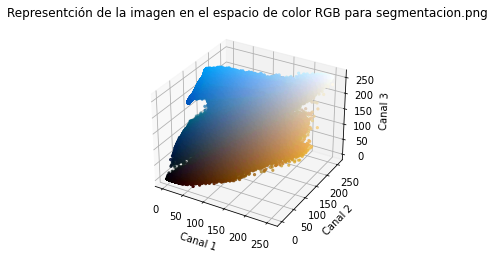

In [11]:
# Grafica espacio de colores RGB 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

c1, c2, c3 = cv.split(imagen_RGB)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imagen_RGB.reshape((np.shape(imagen_RGB)[0]*np.shape(imagen_RGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_title(f'Representción de la imagen en el espacio de color RGB para {Nombre_archivo}')
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

#### Segmentación de agua por histograma

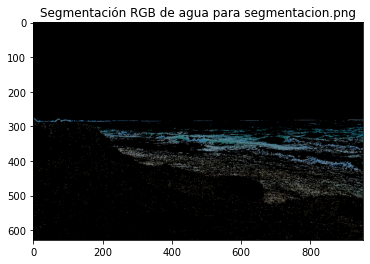

In [12]:
# Segmentacion de agua
color_l = (10, 100, 10)
color_u = (120, 180, 170)

mask = cv.inRange(imagen_RGB, color_l,  color_u)
img_segmentada = cv.bitwise_and(imagen_RGB, imagen_RGB, mask=mask)

plt.figure(6)
plt.title(f'Segmentación RGB de agua para {Nombre_archivo}')
plt.imshow(img_segmentada)
plt.show()

#### Segmentación de cielo por histograma

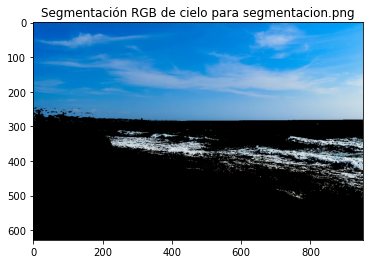

In [13]:
# Segmentacion de cielo
color_l = (0, 0, 180)
color_u = (255, 255, 255)

mask = cv.inRange(imagen_RGB, color_l,  color_u)
img_segmentada = cv.bitwise_and(imagen_RGB, imagen_RGB, mask=mask)

plt.figure(6)
plt.title(f'Segmentación RGB de cielo para {Nombre_archivo}')
plt.imshow(img_segmentada)
plt.show()

#### Segmentación de tierra por histograma

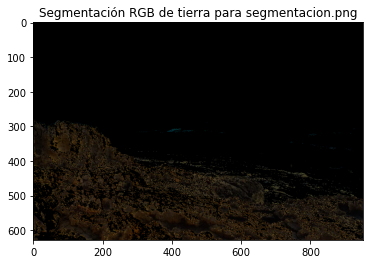

In [14]:
# Segmentacion de tierra
color_l = (0, 0, 0)
color_u = (110, 110, 60)

mask = cv.inRange(imagen_RGB, color_l,  color_u)
img_segmentada = cv.bitwise_and(imagen_RGB, imagen_RGB, mask=mask)

plt.figure(6)
plt.title(f'Segmentación RGB de tierra para {Nombre_archivo}')
plt.imshow(img_segmentada)
plt.show()

### Segmentación usando espacio de colores HSV

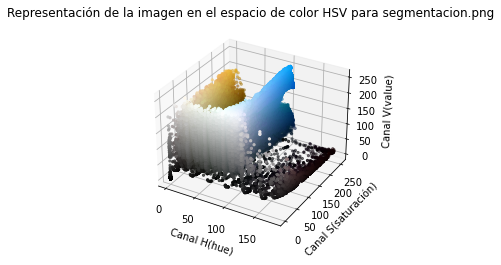

In [15]:
# Grafica espacio de colores HSV 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

imagen_HSV = cv.cvtColor(imagen_BGR, cv.COLOR_BGR2HSV)

c1, c2, c3 = cv.split(imagen_HSV)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imagen_RGB.reshape((np.shape(imagen_RGB)[0]*np.shape(imagen_RGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_title(f'Representación de la imagen en el espacio de color HSV para {Nombre_archivo}')
axis.set_xlabel("Canal H(hue)")
axis.set_ylabel("Canal S(saturación)")
axis.set_zlabel("Canal V(value)")
plt.show()

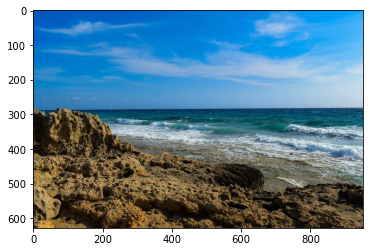

In [16]:
# Muestro imagen en RGB para tomar muestras de áreas relevantes
plt.imshow(imagen_RGB)
plt.show()

#### Muestreo de zonas

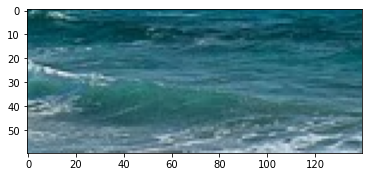

In [17]:
# Tomo una muestra del agua
img_muestra_agua = imagen_RGB[310:370,500:640,:]
plt.figure(2)
plt.imshow(img_muestra_agua)
plt.show()

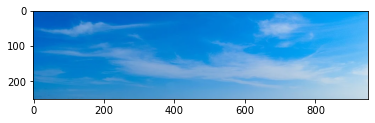

In [18]:
# Tomo una muestra del cielo
img_muestra_cielo = imagen_RGB[0:250,0:950,:]
plt.figure(2)
plt.imshow(img_muestra_cielo)
plt.show()

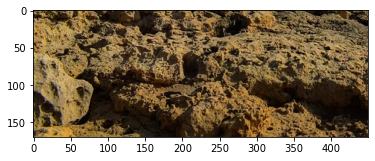

In [19]:
# Tomo una muestra del tierra
img_muestra_tierra = imagen_RGB[450:620,0:450,:]
plt.figure(2)
plt.imshow(img_muestra_tierra)
plt.show()

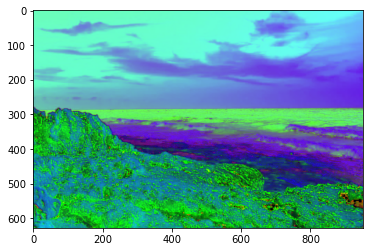

In [20]:
# Muestro la imagen HSV
plt.imshow(imagen_HSV)

In [21]:
# Tomo los valores en HSV para las muestras tomadas anteriormente 
img_muestra_agua_hsv = imagen_HSV[310:370,500:640,:]
img_muestra_cielo_hsv = imagen_HSV[0:250,0:950,:]
img_muestra_tierra_hsv = imagen_HSV[450:620,0:450,:]

color_std_agua = cv.meanStdDev(img_muestra_agua_hsv)
color_std_cielo = cv.meanStdDev(img_muestra_cielo_hsv)
color_std_tierra = cv.meanStdDev(img_muestra_tierra_hsv)

### Segmentación de agua por HSV

In [22]:
# Se calcula media y desvio standard para la muestra de agua 
# Se toman 2.5 desvios standard hacia arriba y hacia abajo de la media para la mascara a aplicar
color_std_agua = cv.meanStdDev(img_muestra_agua_hsv)
print('Datos para filtrado de agua con imagen en espacio HSV')
print(' ')
print(f'Media Agua : {np.round(color_std_agua[0].T, 2)}')
print(f'Std Agua : {np.round(color_std_agua[1].T, 2)}')
print(f'Mascara inferior Agua : {np.round(color_std_agua[0] - 2.5 * color_std_agua[1], 0).T}')
print(f'Mascara superior Agua : {np.round(color_std_agua[0] + 2.5 * color_std_agua[1], 0).T}')

Datos para filtrado de agua con imagen en espacio HSV
 
Media Agua : [[ 95.77 144.07 122.58]]
Std Agua : [[ 2.85 57.02 29.4 ]]
Mascara inferior Agua : [[89.  2. 49.]]
Mascara superior Agua : [[103. 287. 196.]]


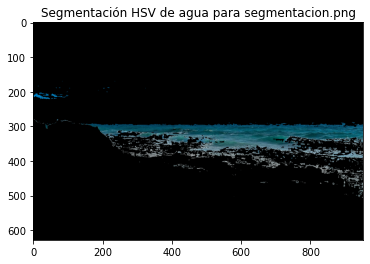

In [23]:
# Segmentacion de agua
color_l = (89, 2, 49)
color_u = (100, 255, 196)

mask = cv.inRange(imagen_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imagen_RGB, imagen_RGB, mask=mask)

plt.figure(6)
plt.title(f'Segmentación HSV de agua para {Nombre_archivo}')
plt.imshow(img_segmentada)
plt.show()

### Segmentación de cielo por HSV

In [24]:
# Se calcula media y desvio standard para la muestra de cielo 
# Se toman 2.5 desvios standard hacia arriba y hacia abajo de la media para la mascara a aplicar
color_std_cielo = cv.meanStdDev(img_muestra_cielo_hsv)
print('Datos para filtrado de cielo con imagen en espacio HSV')
print(' ')
print(f'media cielo : {np.round(color_std_cielo[0].T, 2)}')
print(f'Std cielo : {np.round(color_std_cielo[1].T, 2)}')
print(f'Mascara inferior cielo : {np.round(color_std_cielo[0] - 2.5 * color_std_cielo[1], 2).T}')
print(f'Mascara superior cielo : {np.round(color_std_cielo[0] + 2.5 * color_std_cielo[1], 2).T}')

Datos para filtrado de cielo con imagen en espacio HSV
 
media cielo : [[102.83 189.72 217.26]]
Std cielo : [[ 1.47 64.71 15.89]]
Mascara inferior cielo : [[ 99.17  27.95 177.54]]
Mascara superior cielo : [[106.5  351.49 256.98]]


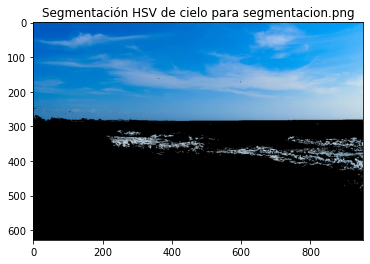

In [25]:
# Segmentacion de cielo
color_l = (99, 27, 177)
color_u = (107, 255, 255)

mask = cv.inRange(imagen_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imagen_RGB, imagen_RGB, mask=mask)

plt.figure(6)
plt.title(f'Segmentación HSV de cielo para {Nombre_archivo}')
plt.imshow(img_segmentada)
plt.show()

### Segmentación de tierra por HSV

In [26]:
# Se calcula media y desvio standard para la muestra de tierra 
# Se toman 2.5 desvios standard hacia arriba y hacia abajo de la media para la mascara a aplicar
color_std_tierra = cv.meanStdDev(img_muestra_tierra_hsv)
print('Datos para filtrado de tierra con imagen en espacio HSV')
print(f'media tierra : {np.round(color_std_tierra[0].T, 2)}')
print(f'Std tierra : {np.round(color_std_tierra[1].T, 2)}')
print(f'Mascara inferior tierra : {np.round(color_std_tierra[0] - 2.5 * color_std_tierra[1], 2).T}')
print(f'Mascara superior tierra : {np.round(color_std_tierra[0] + 2.5 * color_std_tierra[1], 2).T}')

Datos para filtrado de tierra con imagen en espacio HSV
media tierra : [[ 17.3  156.35  98.72]]
Std tierra : [[11.15 52.83 59.1 ]]
Mascara inferior tierra : [[-10.56  24.26 -49.02]]
Mascara superior tierra : [[ 45.16 288.44 246.47]]


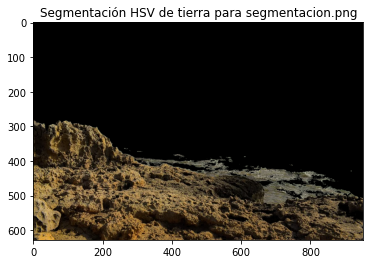

In [27]:
# Segmentacion de tierra
color_l = (0, 24, 0)
color_u = (45, 255, 246)
mask = cv.inRange(imagen_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imagen_RGB, imagen_RGB, mask=mask)

plt.figure(6)
plt.title(f'Segmentación HSV de tierra para {Nombre_archivo}')
plt.imshow(img_segmentada)
plt.show()